"""

TASK 3 : Coding Test (Dataset - 'customer_data.csv')

----
Author : Meghnath Reddy Challa <challameghnath96@gmail.com>

"""

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import silhouette_score

# Read Data

In [3]:
def process_sales_data(file_path):
    sales_data = pd.read_csv(file_path, low_memory=False)
    
    # CustID as the index
    sales_data.set_index(sales_data.columns[0], inplace=True)
    
    print("Shape of the dataset:", sales_data.shape)

    # Convert all columns into numeric
    sales_data = sales_data.replace('[\$,]', '', regex=True).astype(float)
    
    # Replace NaN values with 0
    sales_data.fillna(0, inplace=True)
    
    return sales_data

# Invoke Function
sales_data = process_sales_data("customer_data.csv")
sales_data.head()

Shape of the dataset: (54103, 309)


,Dept 1,Dept 2,Dept 3,Dept 4,Dept 5,Dept 6,Dept 7,Dept 8,Dept 9,Dept 10,...,Dept 300,Dept 301,Dept 302,Dept 303,Dept 304,Dept 305,Dept 306,Dept 307,Dept 308,Dept 309
CustomerID,,,,,,,,,,,,,,,,,,,,,
Customer 1,0.04,0.0,0.04,0.00,7.49,11.63,0.00,99.90,0.00,0.00,...,2.62,0.0,0.19,0.20,1.88,0.60,8.36,8.18,0.00,0.00
Customer 2,0.01,0.0,0.04,0.02,0.00,0.06,0.00,47.28,0.63,0.03,...,57.25,0.0,0.36,0.97,1.38,1.03,1.80,1.92,1.91,0.00
Customer 3,0.00,0.0,0.09,0.00,0.00,0.69,0.00,27.63,0.01,0.05,...,3.14,0.0,0.25,0.80,2.81,0.88,7.47,4.67,2.06,0.00
Customer 4,0.00,0.0,0.07,0.01,0.00,0.35,0.00,0.00,0.01,0.14,...,27.03,0.0,5.67,5.21,1.40,0.54,14.29,0.00,1.32,96.21
Customer 5,0.00,0.0,84.01,0.35,1.11,0.00,0.39,30.37,16.19,49.64,...,29.08,0.0,0.00,0.00,0.17,5.59,0.00,0.23,11.63,25.56


# Find Highly Co-Related Departments

Dept 275 and Dept 109 are highly correlated.
Correlation coefficient: 0.9907230620930793
Mean difference: 9.396240689056071


/var/folders/6b/2zlt1ymn2k517bv8xcgljcdh0000gn/T/ipykernel_2707/2156937827.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (var1, var2), correlation_coefficient in top_correlations.iteritems():


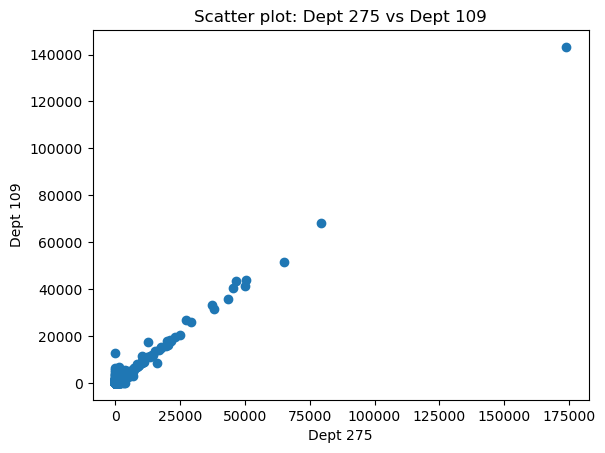

Dept 109 and Dept 275 are highly correlated.
Correlation coefficient: 0.9907230620930793
Mean difference: -9.396240689056071


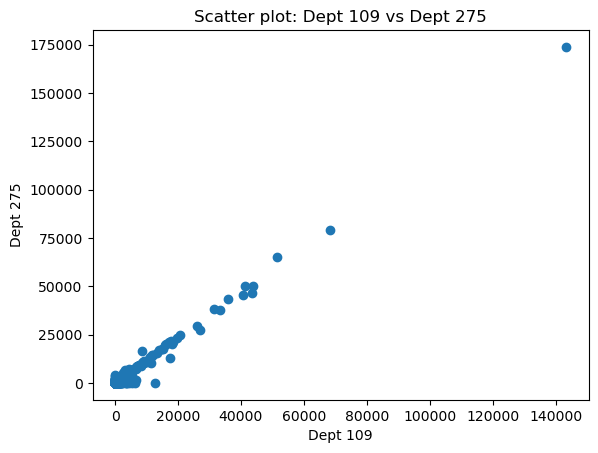

Dept 177 and Dept 217 are highly correlated.
Correlation coefficient: 0.9798218164069926
Mean difference: 4.467265031513964


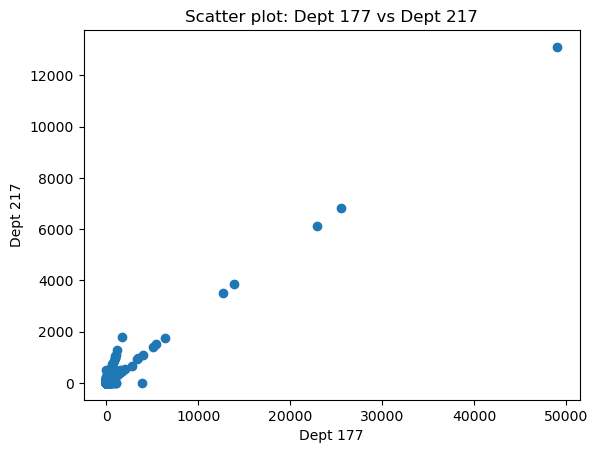

Dept 217 and Dept 177 are highly correlated.
Correlation coefficient: 0.9798218164069926
Mean difference: -4.467265031513964


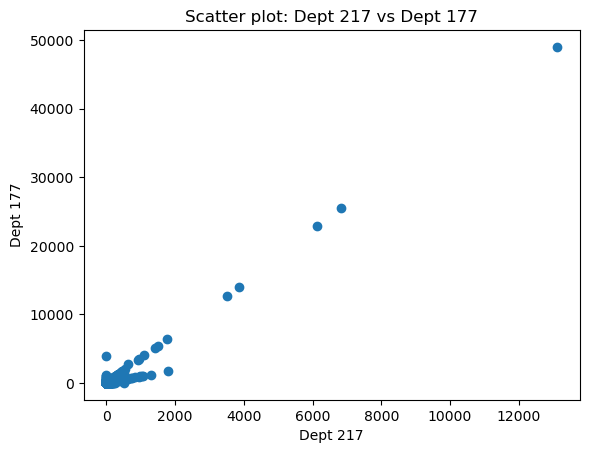

Dept 115 and Dept 221 are highly correlated.
Correlation coefficient: 0.9749269832561703
Mean difference: -1.8930595345914272


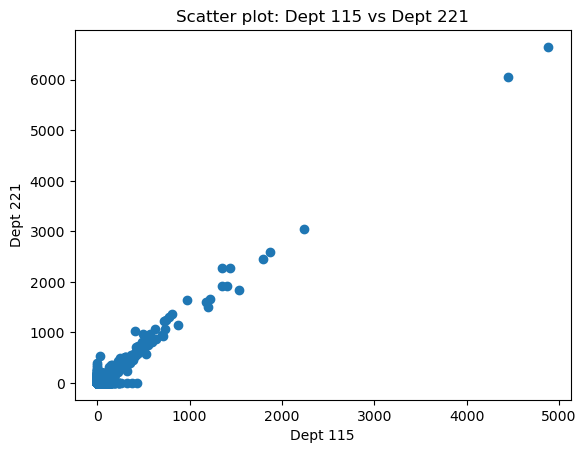

In [4]:
def analyze_correlations(data, num_top_correlations):
    # Calculate the correlation matrix
    correlation_matrix = data.corr().abs()

    # Flatten the correlation matrix to get a 1D array
    correlation_values = correlation_matrix.unstack()

    # Sort the correlation values in descending order
    sorted_correlations = correlation_values.sort_values(ascending=False)

    # Select the top correlated variables (departments) excluding self-correlations
    top_correlations = sorted_correlations[sorted_correlations.index.get_level_values(0) != sorted_correlations.index.get_level_values(1)][:num_top_correlations]

    # Iterate over the chosen pairs for analysis
    for (var1, var2), correlation_coefficient in top_correlations.iteritems():
        # Calculate additional statistics
        mean_difference = data[var1].mean() - data[var2].mean()

        # Print the statistics
        print(f'{var1} and {var2} are highly correlated.')
        print(f'Correlation coefficient: {correlation_coefficient}')
        print(f'Mean difference: {mean_difference}')

        # Plot the scatter plot
        plt.scatter(data[var1], data[var2])
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.title(f'Scatter plot: {var1} vs {var2}')
        plt.show()

analyze_correlations(sales_data, 5)

# Inferences based on the above results.
The correlation scatter plot enables us to comprehend the connection between two variables. For instance, a higher correlation between customers purchasing products from Department 275 and Department 109 suggests a dependency between these two departments. 

In other words, if a customer buys a large quantity of chopping boards, it is likely that they will also require knives.

# Top and Least performing Departments based on transaction amount

In [5]:
def analyze_department_performance(data, num_top_departments, num_bottom_departments):
    # Calculate the total sum of transactions per department
    department_totals = data.apply(lambda row: row.sum(), axis=0)

    # Sort the departments in descending order based on transaction totals
    sorted_departments = department_totals.sort_values(ascending=False)

    # Get the top performing departments
    top_performing_departments = sorted_departments.head(num_top_departments)

    # Get the bottom performing departments
    bottom_performing_departments = sorted_departments.tail(num_bottom_departments)

    # Print the top performing departments
    print('Top Performing Departments:')
    print(top_performing_departments)
    print('\n')

    # Print the bottom performing departments
    print('Bottom Performing Departments:')
    print(bottom_performing_departments)

analyze_department_performance(sales_data, 5, 5)

Top Performing Departments:
Dept 189    31374785.55
Dept 152    14259296.12
Dept 54     13840155.80
Dept 220    13481968.33
Dept 36     12371153.44
dtype: float64


Bottom Performing Departments:
Dept 160    381.75
Dept 2      136.30
Dept 18     109.53
Dept 301     81.11
Dept 137      1.69
dtype: float64


# Top and Least performing Departments based on frequency of transcation

In [6]:
def analyze_department_frequency(data, num_top_departments, num_bottom_departments):
    # Calculate the total sum of transactions per department
    department_totals = data.apply(lambda row: row[row != 0].count(), axis=0)

    # Sort the departments in descending order based on transaction totals
    sorted_departments = department_totals.sort_values(ascending=False)

    # Get the top performing departments
    top_performing_departments = sorted_departments.head(num_top_departments)

    # Get the bottom performing departments
    bottom_performing_departments = sorted_departments.tail(num_bottom_departments)

    # Print the top performing departments
    print('Highest Frequency of Transactions:')
    print(top_performing_departments)
    print('\n')

    # Print the bottom performing departments
    print('Lowest Frequency of Transactions:')
    print(bottom_performing_departments)

# Example usage:
analyze_department_frequency(sales_data, 5, 5)

Highest Frequency of Transactions:
Dept 80     53055
Dept 32     52977
Dept 278    52974
Dept 88     52936
Dept 77     52868
dtype: int64


Lowest Frequency of Transactions:
Dept 55     611
Dept 83     547
Dept 18     277
Dept 137     77
Dept 212      1
dtype: int64


# Calculated Fields

In [7]:
def calculate_new_columns(data):
    # Calculate the new columns
    data['Min_Transcation'] = data.apply(lambda row: row[row != 0].min(), axis=1)
    data['Avg_Transcation'] = data.apply(lambda row: row.mean(), axis=1)
    data['Max_Transcation'] = data.apply(lambda row: row.max(), axis=1)
    data['Total_Transcation'] = (data.iloc[:, :-3]).apply(lambda row: row.sum(), axis=1)
    data['Purchase_Frequency'] = (data.iloc[:, :-4]).apply(lambda row: row[row != 0].count(), axis=1)
    
    return data

augmented_data = calculate_new_columns(sales_data)
augmented_data.head()

,Dept 1,Dept 2,Dept 3,Dept 4,Dept 5,Dept 6,Dept 7,Dept 8,Dept 9,Dept 10,...,Dept 305,Dept 306,Dept 307,Dept 308,Dept 309,Min_Transcation,Avg_Transcation,Max_Transcation,Total_Transcation,Purchase_Frequency
CustomerID,,,,,,,,,,,,,,,,,,,,,
Customer 1,0.04,0.0,0.04,0.00,7.49,11.63,0.00,99.90,0.00,0.00,...,0.60,8.36,8.18,0.00,0.00,0.01,17.870419,771.95,5539.82,231
Customer 2,0.01,0.0,0.04,0.02,0.00,0.06,0.00,47.28,0.63,0.03,...,1.03,1.80,1.92,1.91,0.00,0.01,13.668710,263.71,4237.29,255
Customer 3,0.00,0.0,0.09,0.00,0.00,0.69,0.00,27.63,0.01,0.05,...,0.88,7.47,4.67,2.06,0.00,0.01,14.910355,419.02,4622.20,255
Customer 4,0.00,0.0,0.07,0.01,0.00,0.35,0.00,0.00,0.01,0.14,...,0.54,14.29,0.00,1.32,96.21,0.01,12.316871,443.04,3818.22,239
Customer 5,0.00,0.0,84.01,0.35,1.11,0.00,0.39,30.37,16.19,49.64,...,5.59,0.00,0.23,11.63,25.56,0.01,19.685935,577.57,6102.63,250


# Customer Segmentation with Frequency, Monetary Values 

**1. Group together customers with similar potential sales opportunities**

In [8]:
def calculate_fm_segments(data):
    # Extract FM data
    fm_data = data.iloc[:, -5:]

    # Assign scores based on quartiles for frequency and monetary value
    fm_data['frequency_score'] = pd.qcut(fm_data['Purchase_Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=False)
    fm_data['monetary_value_score'] = pd.qcut(fm_data['Total_Transcation'], q=[0, 0.25, 0.5, 0.75, 1], labels=False)

    # Define segment labels
    segments = {
        (0, 0): 'Rare Purchasers, Low Spending',
        (0, 1): 'Rare Purchasers, Moderate-Low Spending',
        (0, 2): 'Rare Purchasers, Moderate-High Spending',
        (0, 3): 'Rare Purchasers, High Spending',
        (1, 0): 'Occasional Purchasers, Low Spending',
        (1, 1): 'Occasional Purchasers, Moderate-Low Spending',
        (1, 2): 'Occasional Purchasers, Moderate-High Spending',
        (1, 3): 'Occasional Purchasers, High Spending',
        (2, 0): 'Regular Purchasers, Low Spending',
        (2, 1): 'Regular Purchasers, Moderate-Low Spending',
        (2, 2): 'Regular Purchasers, Moderate-High Spending',
        (2, 3): 'Regular Purchasers, High Spending',
        (3, 0): 'Frequent Purchasers, Low Spending',
        (3, 1): 'Frequent Purchasers, Moderate-Low Spending',
        (3, 2): 'Frequent Purchasers, Moderate-High Spending',
        (3, 3): 'Frequent Purchasers, High Spending',
    }

    # Map segment labels based on frequency and monetary value scores
    fm_data['segment_label'] = fm_data[['frequency_score', 'monetary_value_score']].apply(
        lambda x: segments[(x['frequency_score'], x['monetary_value_score'])], axis=1
    )

    # Calculate the count of customers in each segment
    segment_counts = fm_data['segment_label'].value_counts()

    # Calculate the percentage of customers in each segment
    segment_percentages = fm_data['segment_label'].value_counts(normalize=True) * 100

    # Print the percentage of customers in each segment
    print(segment_percentages)
    
    return fm_data

fm_data = calculate_fm_segments(augmented_data)


Rare Purchasers, High Spending                   9.539212
Regular Purchasers, Low Spending                 7.683493
Frequent Purchasers, Moderate-Low Spending       7.439514
Rare Purchasers, Moderate-High Spending          7.372974
Occasional Purchasers, Low Spending              6.753784
Occasional Purchasers, Moderate-High Spending    6.385968
Regular Purchasers, Moderate-Low Spending        6.378574
Frequent Purchasers, Low Spending                6.164168
Occasional Purchasers, Moderate-Low Spending     6.116112
Occasional Purchasers, High Spending             5.975639
Regular Purchasers, Moderate-High Spending       5.923886
Frequent Purchasers, Moderate-High Spending      5.315787
Rare Purchasers, Moderate-Low Spending           5.066262
Regular Purchasers, High Spending                4.827828
Frequent Purchasers, High Spending               4.657782
Rare Purchasers, Low Spending                    4.399017
Name: segment_label, dtype: float64


# TYPICAL CUSTOMER - TARGETED APPROACH

Identify actionable insights: Develop strategies to target and engage customers in different segments. For example, we might want to focus on retaining high-spending customers or re-engaging customers who have low spending and purchase frequency.

Monitor segment changes over time: As time progresses, we can periodically re-run the FM analysis and track changes in segment distribution. This will help to identify shifts in customer behavior and adapt strategies.

# Calculate Segment Means for a Specific Feature

**2. Sets of customers with similar properties**

In [8]:
def calculate_segment_means(data, feature):
    # Calculate the mean of the specified feature for each segment
    segment_means = data.groupby('segment_label')[feature].mean()

    # Sort the results in descending order
    segment_means = segment_means.sort_values(ascending=False)

    # Print the mean values for each segment and feature combination
    print(segment_means)

calculate_segment_means(fm_data, 'Avg_Transcation')

segment_label
Frequent Purchasers, High Spending               99.468278
Rare Purchasers, High Spending                   75.303706
Occasional Purchasers, High Spending             63.161106
Regular Purchasers, High Spending                62.903249
Rare Purchasers, Moderate-High Spending          27.453014
Occasional Purchasers, Moderate-High Spending    27.168032
Regular Purchasers, Moderate-High Spending       27.039134
Frequent Purchasers, Moderate-High Spending      26.839183
Rare Purchasers, Moderate-Low Spending           17.865359
Occasional Purchasers, Moderate-Low Spending     17.718785
Regular Purchasers, Moderate-Low Spending        17.657524
Frequent Purchasers, Moderate-Low Spending       17.489712
Frequent Purchasers, Low Spending                12.262688
Regular Purchasers, Low Spending                 11.540700
Rare Purchasers, Low Spending                    11.227614
Occasional Purchasers, Low Spending              11.218500
Name: Avg_Transcation, dtype: float64


# SIMILAR CHARACTERISTICS

To identify sets of customers with similar properties based on their categories and sales opportunities, we can consider various features such as 'average', 'maximum' and 'minimum' transaction amount. By analyzing these features, we can gain insights into the spending patterns and behavior of different customer segments.

For example, customer segment "Frequent Purchasers, High Spending" with a segment value of 99.468278. This segment consists of customers who make frequent purchases and spend a significant amount of money. By examining the maximum transaction amount within this segment, we can determine the upper range of spending for these customers.

Similarly, for the segment "Rare Purchasers, High Spending" with a segment value of 75.303706, we can observe their maximum transaction amount to understand their spending potential when they do make purchases.

Additionally, we can analyze the minimum transaction amount for each segment to gain insights into the lowest spending range within each category. This can provide a better understanding of the overall spending behavior and opportunities for each customer segment.

By using these features such as maximum and minimum transaction amounts, we can differentiate and categorize customers based on their spending patterns, identify similar properties within each segment, and tailor marketing strategies to optimize sales opportunities for each customer group.

# 3. Describing a typical customer

# EXPLANATION OF DIFFERENT SEGMENTS

Rare Purchasers, High Spending: These customers make infrequent purchases but spend a significant amount of money when they do.

Rare Purchasers, Moderate-Low Spending: These customers make infrequent purchases but spend a moderate to low amount.

Rare Purchasers, Moderate-High Spending: These customers make infrequent purchases but spend a moderate to high amount when they do.

Rare Purchasers, Low Spending: These customers make infrequent purchases and spend a relatively small amount.

Regular Purchasers, Low Spending: These customers make purchases consistently, but their spending is relatively low.

Regular Purchasers, Moderate-Low Spending: These customers make consistent purchases, but their spending falls within the moderate to low range.

Regular Purchasers, Moderate-High Spending: These customers make consistent purchases, and their spending falls within the moderate to high range.

Regular Purchasers, High Spending: These customers make consistent purchases, and their spending is relatively high.

Frequent Purchasers, Moderate-Low Spending: These customers make purchases frequently but tend to spend a moderate to low amount.

Frequent Purchasers, Low Spending: These customers make purchases frequently but spend a relatively small amount.

Frequent Purchasers, Moderate-High Spending: These customers make purchases frequently and spend a moderate to high amount.

Frequent Purchasers, High Spending: These customers make purchases frequently and spend a significant amount of money.

Occasional Purchasers, Low Spending: These customers make sporadic purchases, and their spending is relatively low.

Occasional Purchasers, Moderate-High Spending: These customers make sporadic purchases but tend to spend a moderate to high amount.

Occasional Purchasers, Moderate-Low Spending: These customers make sporadic purchases and spend a moderate to low amount.

Occasional Purchasers, High Spending: These customers make sporadic purchases and spend a significant amount of money.